# DS-HW[3] Data Visualization

## Problem 1. Data Visualization

In [2]:
import sys
sys.path.append("PATH")
sys.path.append("c:/Users/An Jae Hyuk/AppData/Local/Programs/Python/Python311/site-packages")

In [2]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import os

In [5]:
data_folder = "dataset/"
fileExt = r".csv"
filenames= [file for file in os.listdir(data_folder) if file.endswith(fileExt)]
program_1 = pd.read_csv(data_folder+filenames[0],sep=",", index_col=0)
program_2 = pd.read_csv(data_folder+filenames[1],sep=",", index_col=0)
program_3 = pd.read_csv(data_folder+filenames[2],sep=",", index_col=0)

In [5]:
program_1.head()

tick  tick_idx           x         y          z    ang_j1     ang_j2  \
0  1631784032         0  342.173431 -5.972660 -53.939159 -1.000000  77.000000   
1  1631784032         1  342.142242 -6.038722 -53.948166 -1.033452  76.972366   
2  1631784032         2  341.860413 -6.632731 -54.028862 -1.167259  76.861832   
3  1631784032         3  341.702972 -6.962309 -54.073471 -1.234162  76.806564   
4  1631784032         4  341.290527 -7.817771 -54.188831 -1.401421  76.668396   

      ang_j3  
0  37.000000  
1  37.048000  
2  37.240002  
3  37.336002  
4  37.576000

In [6]:
program_2.head()

tick  tick_idx           x          y          z     ang_j1  \
0  1631778101         0  339.060577 -90.851006 -51.205772 -15.000000   
1  1631778101         1  339.060577 -90.851006 -51.205772 -15.003661   
2  1631778101         2  338.753448 -91.000725 -51.321831 -15.054912   
3  1631778101         3  338.414062 -91.164604 -51.448944 -15.102501   
4  1631778101         4  337.948669 -91.386711 -51.621231 -15.164734   

      ang_j2     ang_j3  
0  80.000000  32.000000  
1  79.991051  32.015999  
2  79.865761  32.240002  
3  79.749435  32.448002  
4  79.597313  32.720001

In [7]:
program_3.head()

tick  tick_idx           x          y          z     ang_j1  \
0  1631767769         0  339.060577 -90.851006 -51.205772 -15.000000   
1  1631767769         1  339.029907 -90.866013 -51.217400 -15.010983   
2  1631767769         2  338.414062 -91.164604 -51.448944 -15.102501   
3  1631767769         3  337.948669 -91.386711 -51.621231 -15.164734   
4  1631767769         4  337.354919 -91.665787 -51.837704 -15.241610   

      ang_j2     ang_j3  
0  80.000000  32.000000  
1  79.973152  32.048000  
2  79.749435  32.448002  
3  79.597313  32.720001  
4  79.409393  33.056000

** Use "program 1 - angle j1, j2, j3" in the process of solving the problem below

1) Three line chart for each parameter.

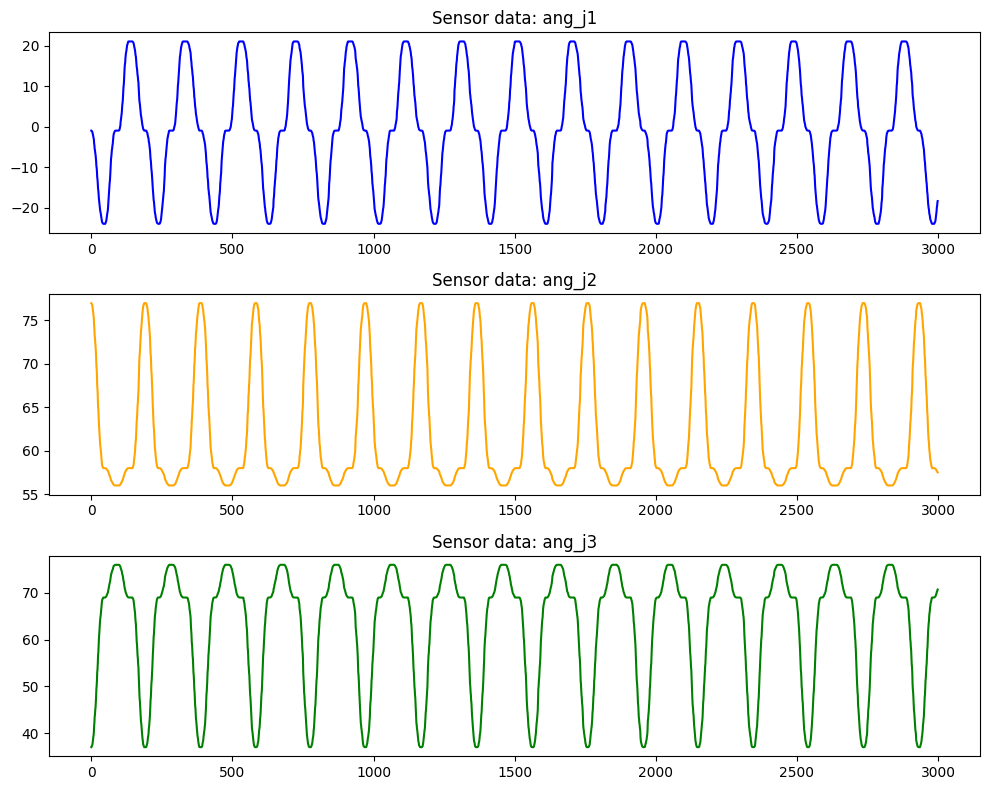

In [5]:
colors = ['b', 'orange', 'g']
columns = program_1.columns.drop(['tick_idx'])
x_data = range(0, program_1.shape[0])

fig, ax = plt.subplots(len(columns[4:]), 1, figsize=(10, 8))

for i, column in enumerate(columns[4:]):
    ax[i].plot(x_data, program_1[column], color=colors[i % len(colors)])
    ax[i].set_title('Sensor data: ' + column)

plt.tight_layout()
plt.show()

2) A integrated line chart for each parameter on one graph.

<AxesSubplot:title={'center':'Angle Dataset'}>

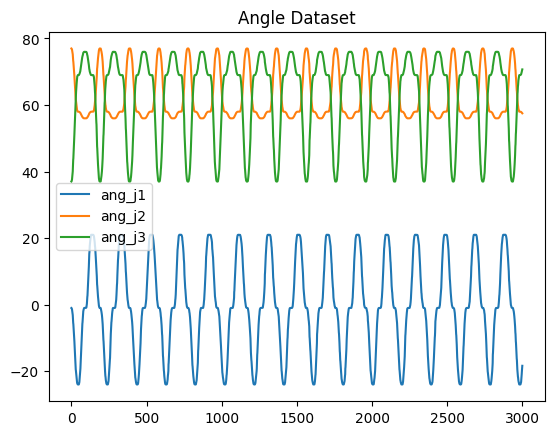

In [6]:
program_1[['ang_j1', 'ang_j2', 'ang_j3']].plot.line(title='Angle Dataset')

3) Scatter each parameter value on one graph(same condition as (2)).

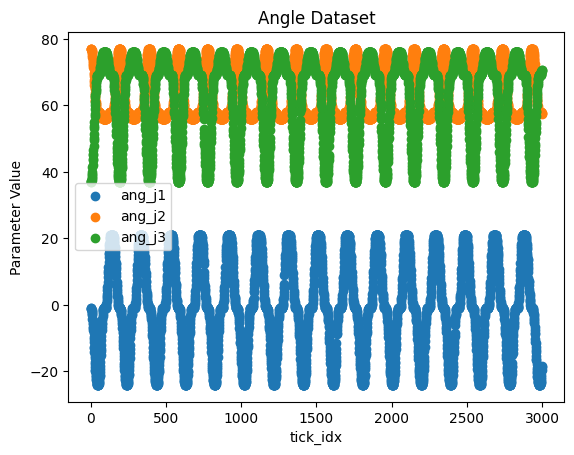

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for column in ['ang_j1', 'ang_j2', 'ang_j3']:
    ax.scatter(program_1['tick_idx'], program_1[column], label=column)

ax.set_title('Angle Dataset')
ax.set_xlabel('tick_idx')
ax.set_ylabel('Parameter Value')
ax.legend(loc='best')

plt.show()

4) There histogram for each parameter

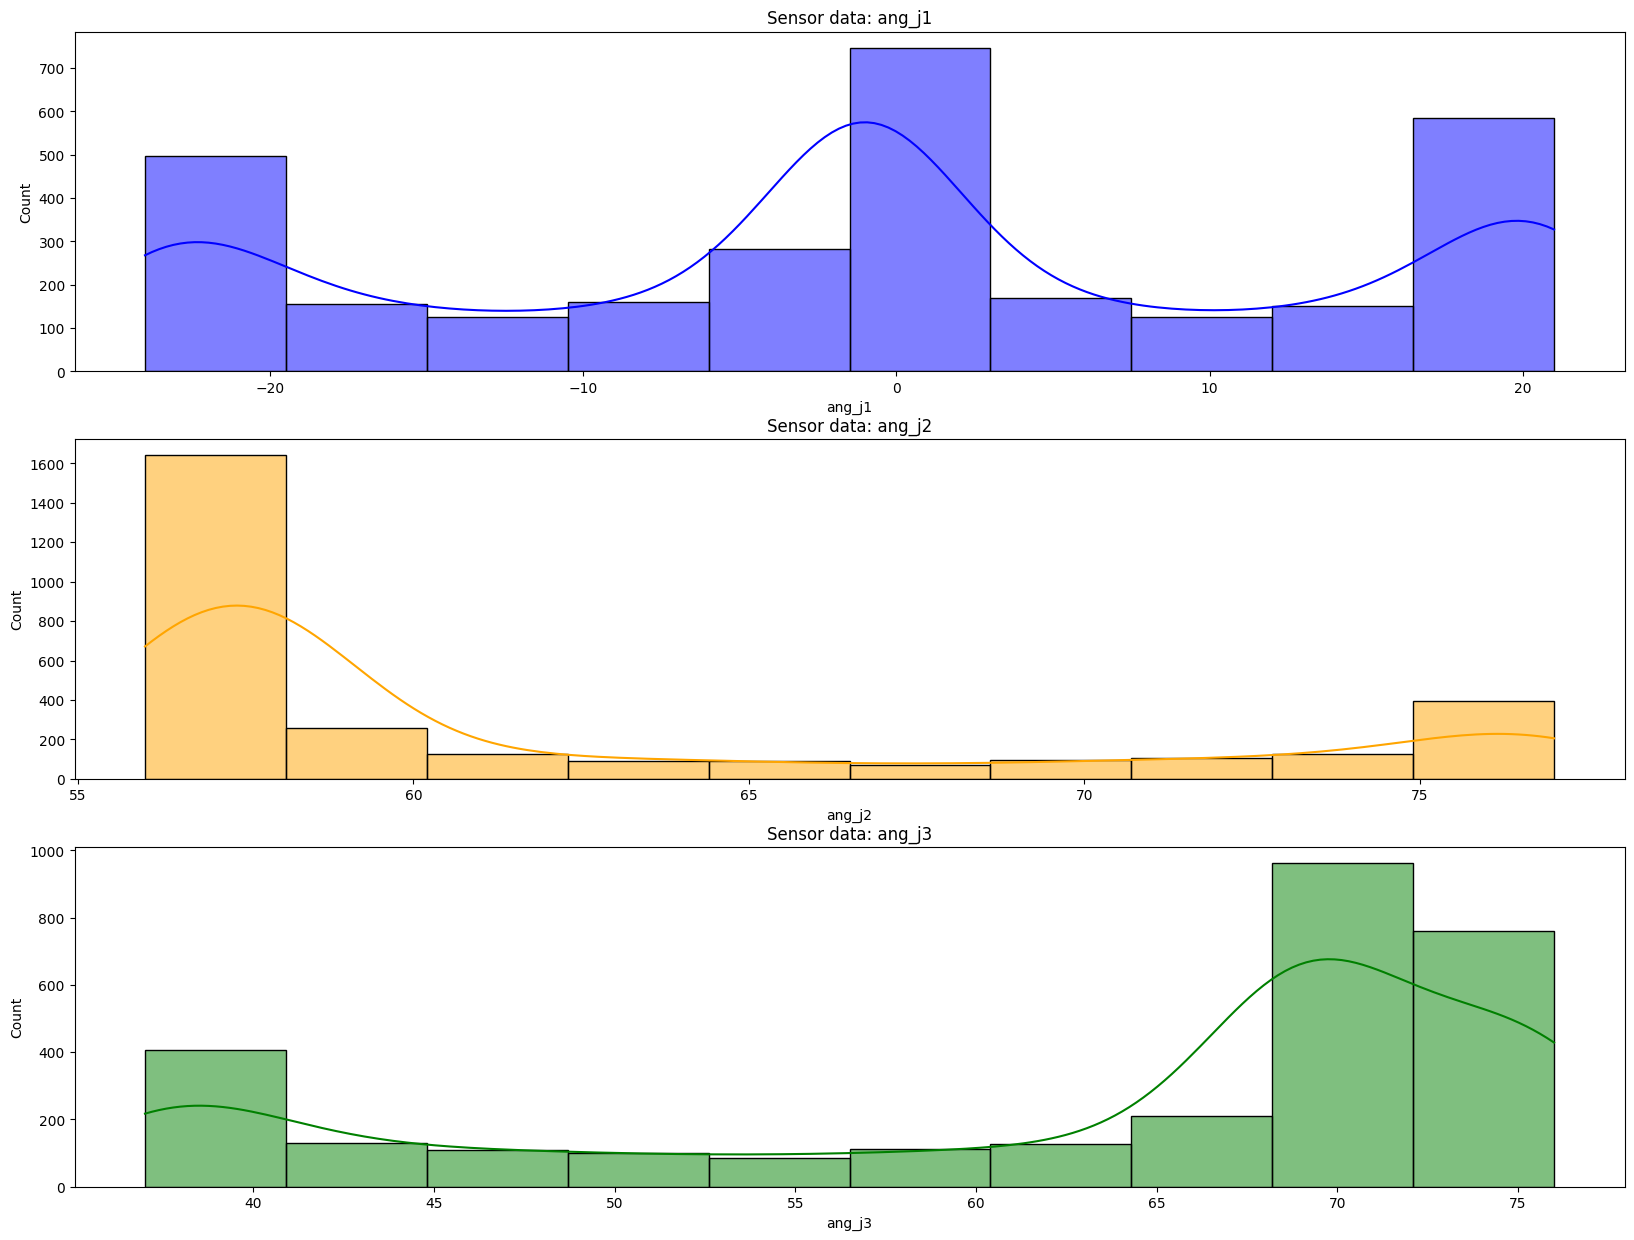

In [8]:
import seaborn as sns

colors = ['b', 'orange', 'g']

fig, ax = plt.subplots(3, 1, figsize=(20, 15))
i = 0

for column in ['ang_j1', 'ang_j2', 'ang_j3']:
    sns.histplot(program_1[column], bins=10, kde=True, color=colors[i], ax=ax[i])
    ax[i].set_title('Sensor data: ' + column)
    i += 1

plt.show()

5) Boxplot for each parameter

In [9]:
df = program_1[['ang_j1', 'ang_j2', 'ang_j3']]

In [10]:
import seaborn as sns

df_melted = df.melt(var_name='Angle', value_name='Value')
sns.boxplot(x='Angle', y='Value', data=df_melted)

<AxesSubplot:xlabel='Angle', ylabel='Value'>

6) Heatmap of ‘angle’ sensor data

In [11]:
angles_to_plot = ['ang_j1', 'ang_j2', 'ang_j3']
corr = program_1[angles_to_plot].corr()

In [12]:
corr

ang_j1    ang_j2    ang_j3
ang_j1  1.000000 -0.022916  0.019596
ang_j2 -0.022916  1.000000 -0.995859
ang_j3  0.019596 -0.995859  1.000000

<AxesSubplot:>

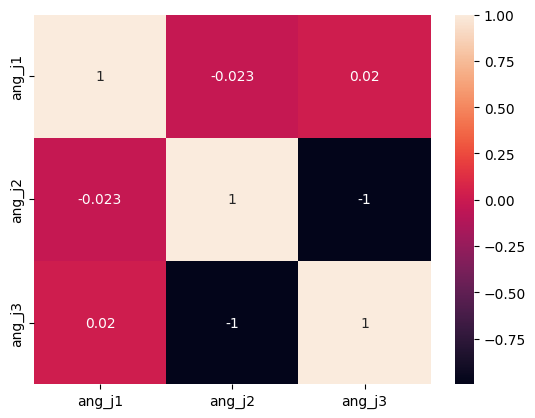

In [13]:
sns.heatmap(corr, annot=True)

7) Pairplot of ‘angle’ sensor data

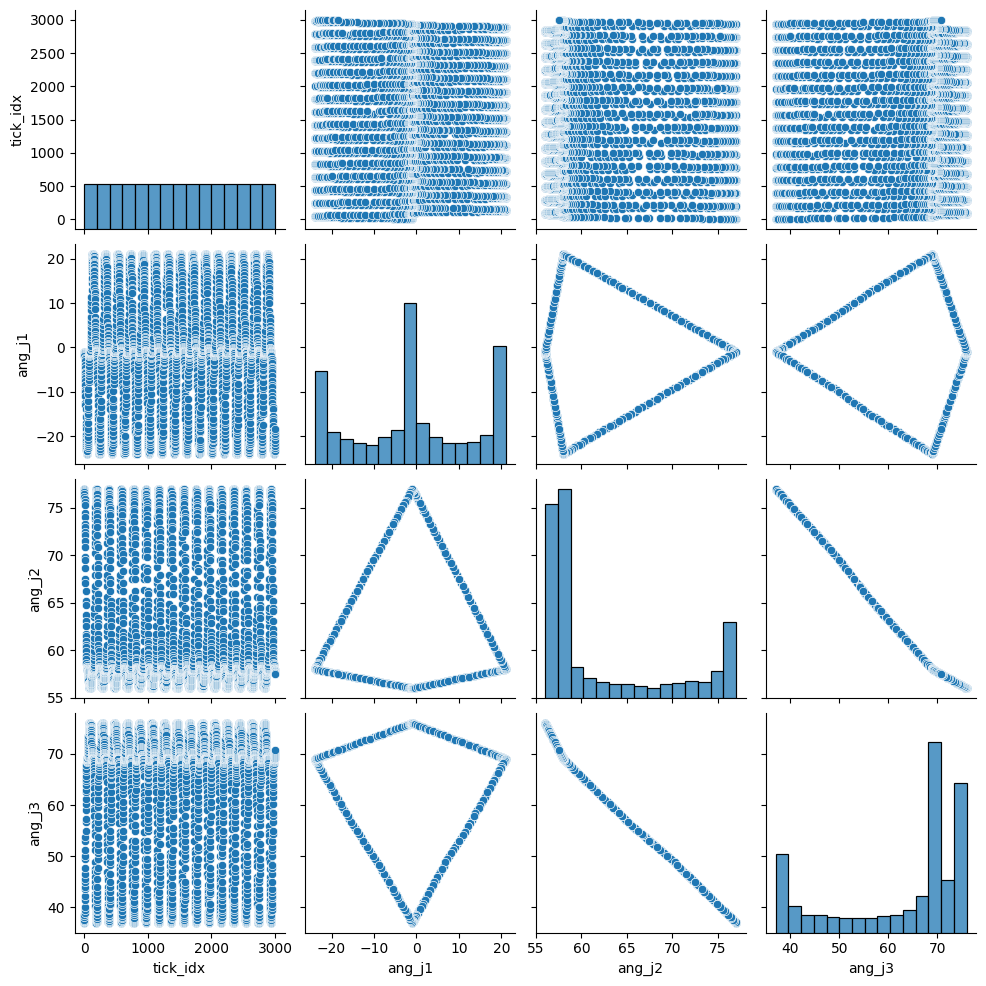

In [14]:
angles_to_plot = ['tick_idx', 'ang_j1', 'ang_j2', 'ang_j3']

sns.pairplot(program_1[angles_to_plot])

### Analyze the visualized results from the following perspective.

#### 1) Compare the results of Problem 1-1) with the results of Problem 1-2).

Which graph looks better? When should the graphs of 1-1) and 1-2) be used respectively? Explain logically what you think and why you think so.

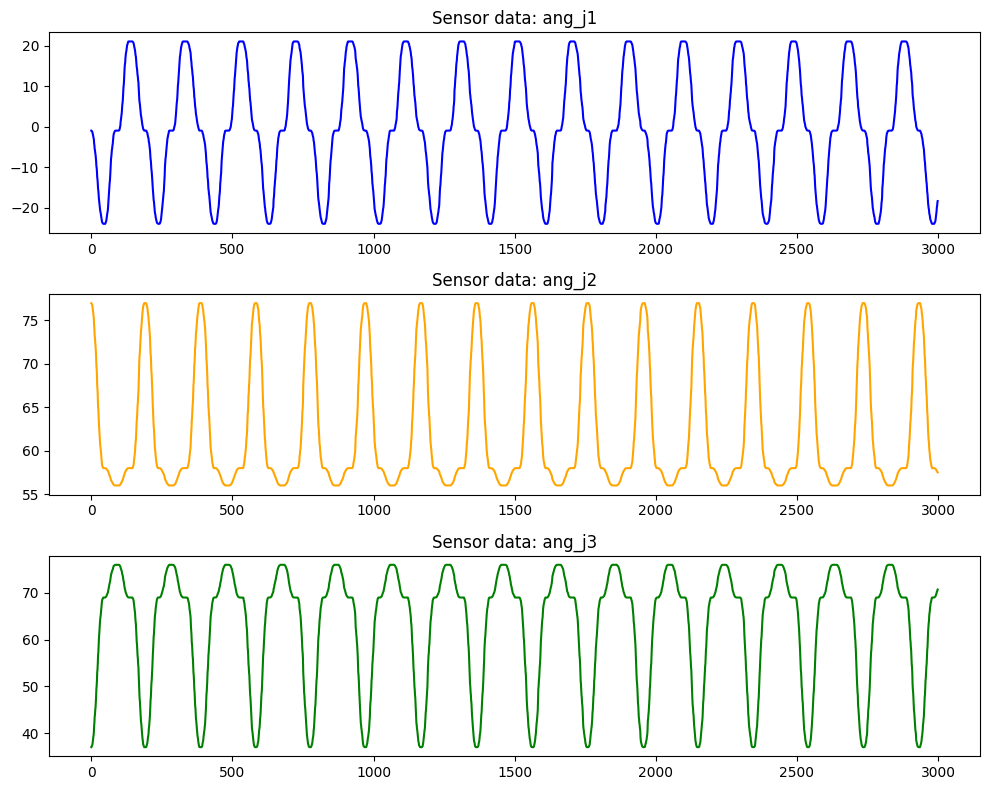

In [6]:
colors = ['b', 'orange', 'g']
columns = program_1.columns.drop(['tick_idx'])
x_data = range(0, program_1.shape[0])

fig, ax = plt.subplots(len(columns[4:]), 1, figsize=(10, 8))

for i, column in enumerate(columns[4:]):
    ax[i].plot(x_data, program_1[column], color=colors[i % len(colors)])
    ax[i].set_title('Sensor data: ' + column)

plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Angle Dataset'}>

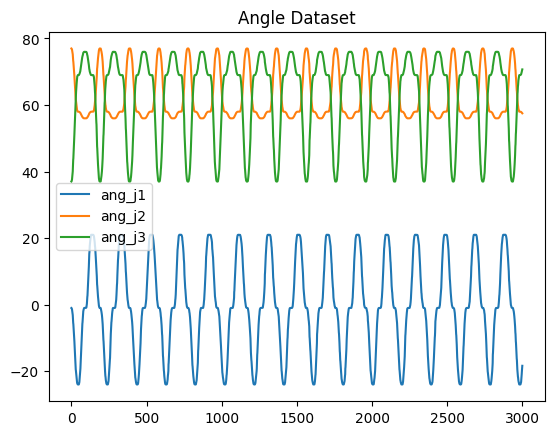

In [7]:
program_1[['ang_j1', 'ang_j2', 'ang_j3']].plot.line(title='Angle Dataset')

In [22]:
# 각 파라미터 별 최대, 최소 측정하는 코드
max = 0
min = 0

# ang_j1
for i in range(0, len(program_1['ang_j1'])):
    temp = program_1['ang_j1'][i]
    if temp > max:
        max = temp
    if temp < min:
        min = temp
        
print("ang_j1 :",'max =', max, ', min =', min)

#ang_j2
for i in range(0, len(program_1['ang_j2'])):
    temp = program_1['ang_j2'][i]
    if temp > max:
        max = temp
    if temp < min:
        min = temp
        
print("ang_j2 :",'max =', max, ', min =', min)

#ang_j3
for i in range(0, len(program_1['ang_j3'])):
    temp = program_1['ang_j3'][i]
    if temp > max:
        max = temp
    if temp < min:
        min = temp
        
print("ang_j3 :",'max =', max, ', min =', min)

ang_j1 : max = 21.0 , min = -24.0
ang_j2 : max = 77.0 , min = -24.0
ang_j3 : max = 77.0 , min = -24.0


In [23]:
# ang_j2와 ang_j3의 교차값을 측정하는 코드
length = len(program_1['ang_j2'])

for i in range(0, length):
    if int(program_1['ang_j2'][i]) == int(program_1['ang_j3'][i]):
        temp = program_1['ang_j2'][i]
        print(temp)

62.0069313
62.0069313
62.0069313
62.0069313
62.0069313


Program_1의 세 가지 angle 파라미터에 대해 나타난 그래프다. 세 가지 angle 파리미터에 대해 그래프를 각각 표현한 것과 하나의 그래프에 표현한 것에 대해 비교 분석할 것이다.  
  
먼저 세 가지의 파라미터를 각각 그래프 하나씩 표현했을 때, 각 파라미터의 특징에 대해 자세히 분석하기 편하다는 장점이 있다. 세 가지 파리미터의 데이터 모두 일정한 간격을 두고 반복되는 특징이 있으며, 데이터의 max값과 min값이 각 파라미터마다 다르다는 것을 알 수 있다. 'ang_j1'의 최대.최소값은 (21.0, -24.0), 'ang_j2'는 (77.0, -24.0), 'ang_j3'는 (77.0, -24.0)이다. 이처럼 각 파라미터에 대해 하나씩 그래프로 나타내는 경우는, 파리미터를 하나씩 자세하게 분석하고자 하는 경우이며 최대.최소값이나 데이터 주기 양상 등을 확인할 때 사용된다고 생각한다.   
  
그리고 세 가지의 파라미터를 하나의 그래프로 합쳐서 나타낸 결과, 'ang_j2'와 'ang_j3'에서 데이터 값이 동일한 지점이 존재하는 것을 알 수 있다. 두 파라미터의 데이터 모두 일정한 주기로 반복되기 때문에, 데이터 값이 겹치는 지점 또한 일정한 주기를 가지고 반복된다. 대략적으로 두 파라미터의 그래프가 교차하는 지점에서의 데이터 값은 약 62.01이라는 것을 코드를 통해 알 수 있다. 그에 반해 'ang_j3'은 다른 파라미터의 데이터와 겹치는 곳이 없는 것을 알 수 있다. 또한 로봇에서 측정된 데이터 구간은 '-24.0 ~ 21.0'과 '-24.0 ~ 77.0' 이라는 것을 알 수 있는데, 이는 로봇으로부터 측정된 angle 데이터는 데이터 구간이 겹치는 'ang_j2'과 'ang_j3'으로 인해 분산이 수치 상 크게 나타나지 않을 것이라고 추측된다. 이처럼 여러 파리미터를 하나의 그래프로 나타내는 경우에는, 여러 파리미터를 비교하는 경우에 유용하게 쓰일 수 있다고 생각한다. 구체적으로 데이터가 주로 많이 겹치는 구간과 데이터 값, 전체적으로 데이터 값이 존재하는 구간 등을 확인하는 경우 등을 예로 들 수 있다.

#### 2) Compare the results of Problem 1-2) with the results of Problem 1-3).

Which graph is better if you want to observe sensor data by parameter? Explain logically what you think and why you think so.

<AxesSubplot:title={'center':'Angle Dataset'}>

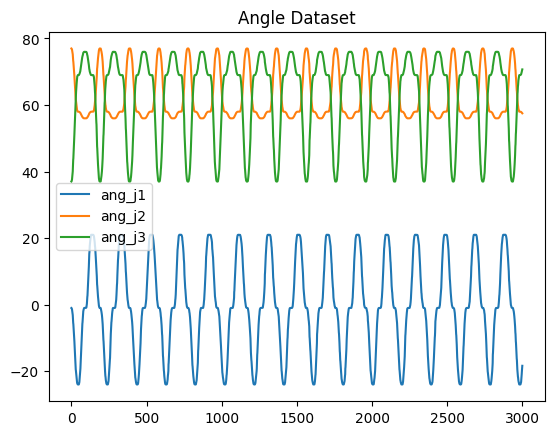

In [8]:
program_1[['ang_j1', 'ang_j2', 'ang_j3']].plot.line(title='Angle Dataset')

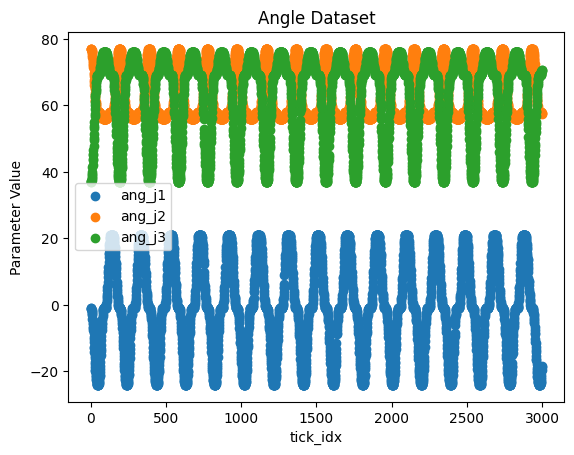

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for column in ['ang_j1', 'ang_j2', 'ang_j3']:
    ax.scatter(program_1['tick_idx'], program_1[column], label=column)

ax.set_title('Angle Dataset')
ax.set_xlabel('tick_idx')
ax.set_ylabel('Parameter Value')
ax.legend(loc='best')

plt.show()

세 가지의 파라미터에 대한 그래프를 각각 line chart와 scatter chart로 나타내었다. 먼저 가시적으로 확인할 수 있는 차이점은 그래프 형태가 실선으로 이어져 있는 것과 점으로 이어져 있다는 점이다. scatter chart는 점으로 데이터 값을 표기하기 때문에, 데이터가 불연속적인 경우에는 데이터 수치와 분포 형태를 한눈에 파악하기 쉽다. 다만 위의 그래프와 같이 데이터가 연속적으로 이루어져 있는 경우, 데이터의 분포 형태를 자세히 파악하기 어렵다. 예를 들어, 그래프가 갑작스럽게 매우 작은 각도로 꺾이는 경우에 점들이 겹쳐져 있어서 데이터가 어떻게 분포해 있는지 확인하기 힘들다. 그리고 두 개 이상의 파라미터가 겹쳐져 있는 경우에도 점이 두껍기 때문에, 어느 인덱스에서 겹치는지 추측해야 할 범위가 광범위하며 정확히 판단하기 어렵다. 반면에 line chart로 나타내었을 경우 scatter chart에 비해 데이터의 위치, 분포 등을 상대적으로 파악하기 쉽고, 두 개 이상의 파라미터가 겹치는 경우에도 어느 인덱스 범위에서 겹치게 되었는지 추측이 쉽게 가능하다. 따라서 두 종류의 chart를 비교해보았을 때, line chart가 센서 데이터를 관측하기 더 낫다고 할 수 있다.

#### 3) Analyze the results of the histogram and line chart.

What are the characteristics of the sensor data for each parameter? Are the distributions of each parameter similar? What do you think?

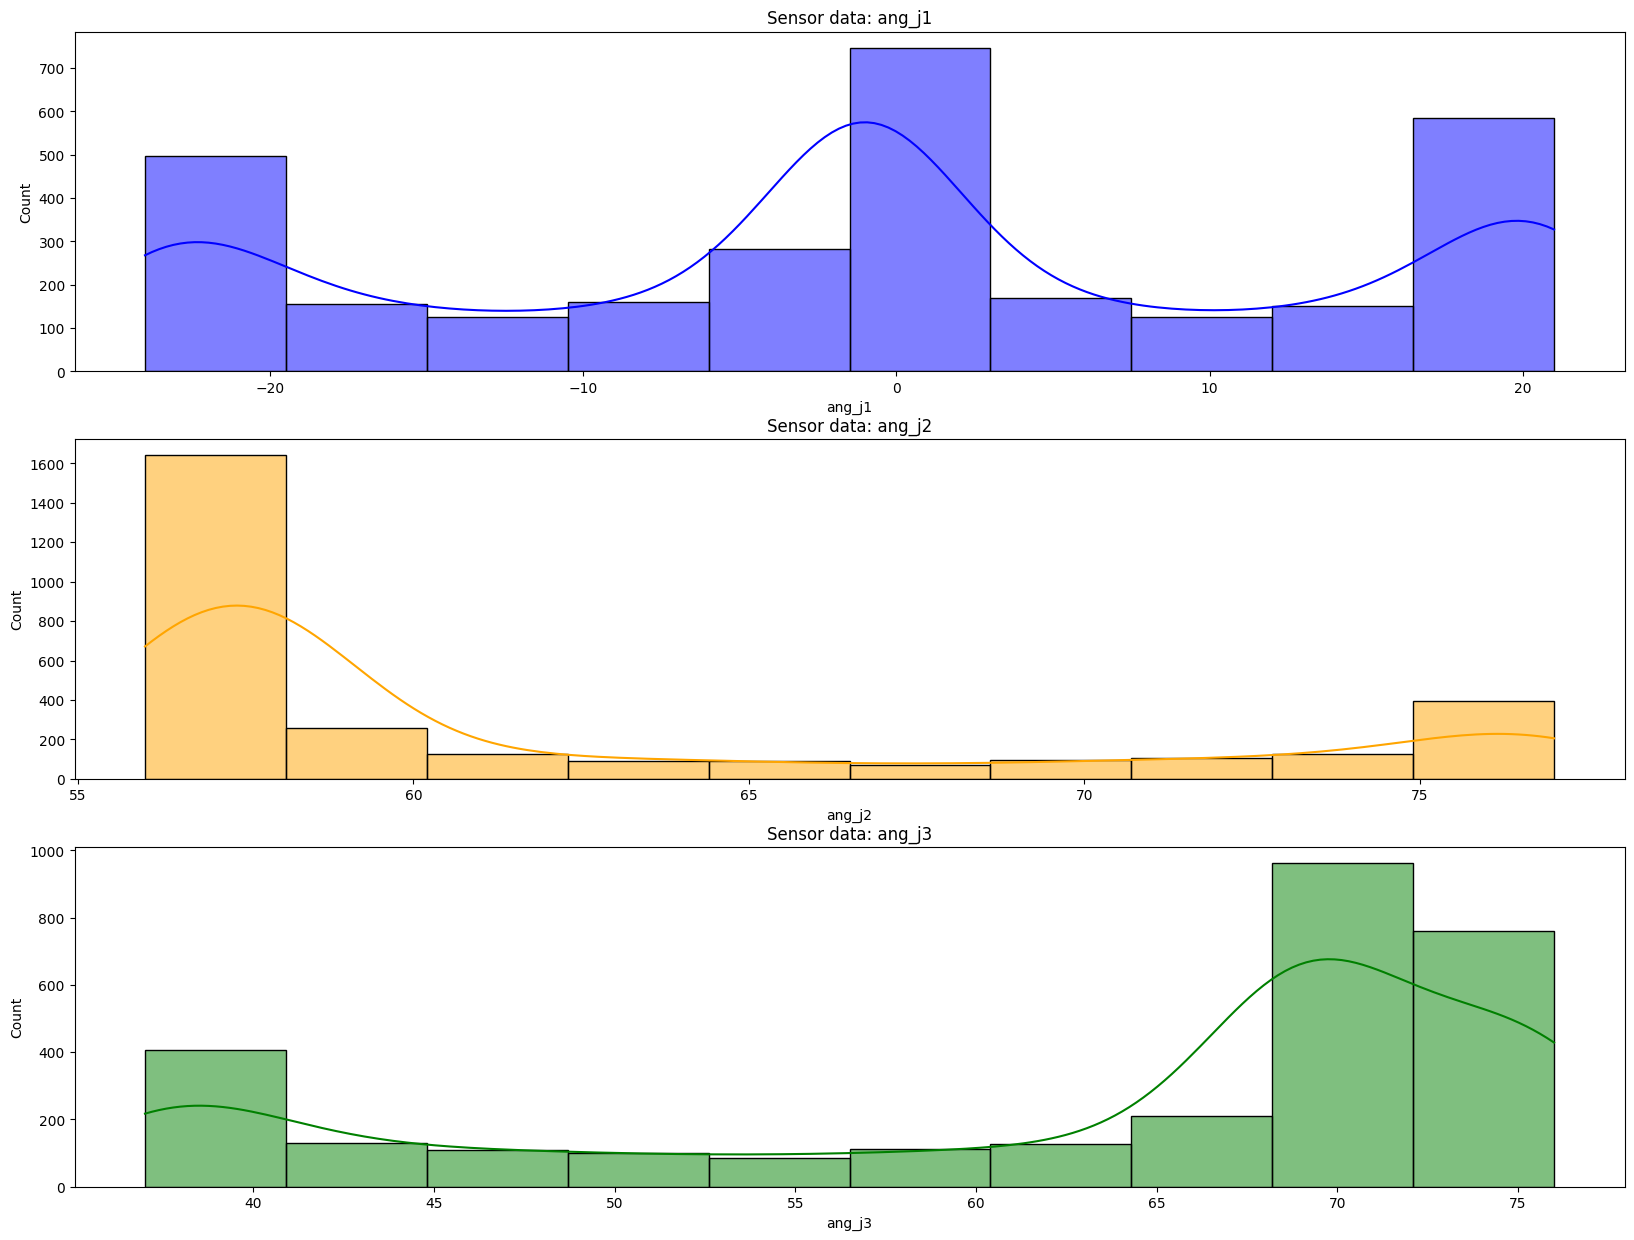

In [10]:
import seaborn as sns

colors = ['b', 'orange', 'g']

fig, ax = plt.subplots(3, 1, figsize=(20, 15))
i = 0

for column in ['ang_j1', 'ang_j2', 'ang_j3']:
    sns.histplot(program_1[column], bins=10, kde=True, color=colors[i], ax=ax[i])
    ax[i].set_title('Sensor data: ' + column)
    i += 1

plt.show()

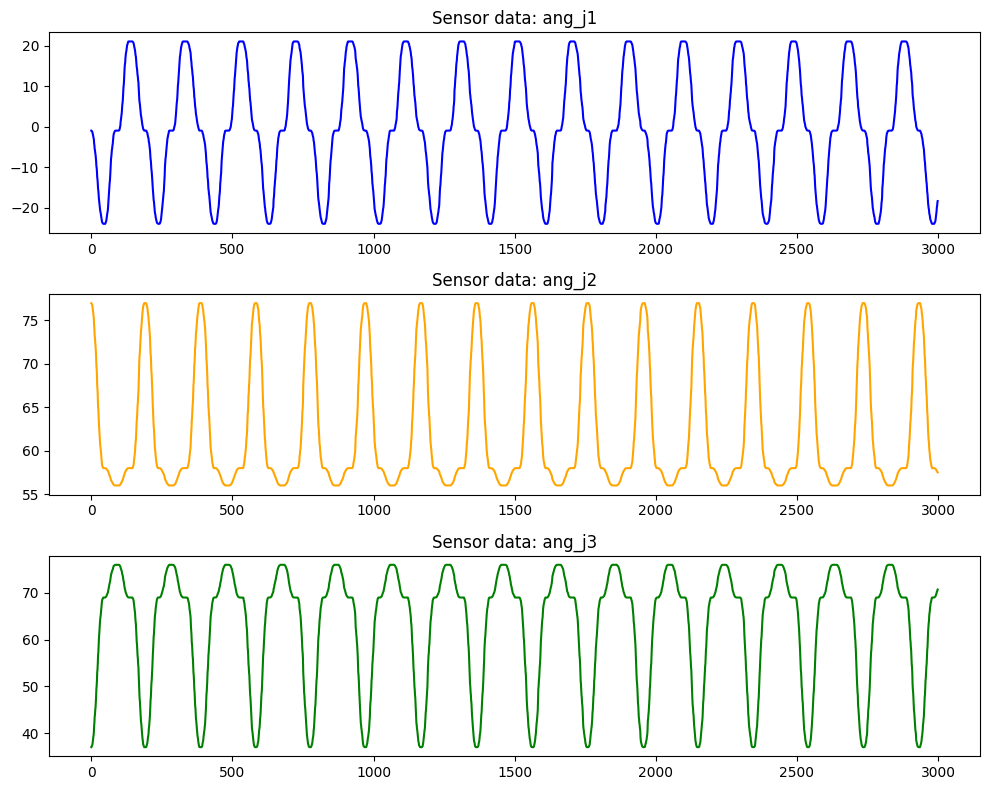

In [11]:
colors = ['b', 'orange', 'g']
columns = program_1.columns.drop(['tick_idx'])
x_data = range(0, program_1.shape[0])

fig, ax = plt.subplots(len(columns[4:]), 1, figsize=(10, 8))

for i, column in enumerate(columns[4:]):
    ax[i].plot(x_data, program_1[column], color=colors[i % len(colors)])
    ax[i].set_title('Sensor data: ' + column)

plt.tight_layout()
plt.show()

histogram과 line chart를 이용하여 각 파라미터를 분석하는 단계이다. 먼저 histogram을 통해 데이터의 전체 범위와 각 데이터 구간 별로 얼마나 많은 데이터가 존재하는지 파악할 수 있다. 그리고 line chart를 통해 인덱스에 따른 데이터의 변화 양상을 쉽게 알 수 있다.  
  
'ang_j1'은 데이터 값의 범위가 대략 -26 ~ 21.5 부근 사이에서 분포하며, 데이터 중 (-26 ~ -19), (-0.15 ~ 0.3), (16 ~ 21.5) 이렇게 세 부분에서 데이터가 몰려있는 것을 알 수 있다. 정확히 첫 부분과 중간 부분 그리고 끝 부분에서 데이터가 균일하게 분포되어 있어서 평균값이 0에 가까울 것이며, 0 이상의 값을 가진 데이터의 비중이 0 미만의 데이터보다 조금 더 크기 때문에 평균값은 0보다 조금 더 큰 값을 가질 것이다.  
  
'ang_j2'는 데이터 값의 범위가 약 56 ~ 77 사이에서 분포하며, (56 ~ 58) 범위에 데이터가 매우 집중적으로 몰려있는 것을 알 수 있다. 이에 따라 평균값은 약 58에서 크게 벗어나지 않을 것으로 추측되며, line chart에서도 그래프의 기울기가 대략 (56 ~ 58) 범위에서 완만하고 그 외의 범위에서 가파른 것으로 보아 histogram의 결과와 일치하는 것을 알 수 있다.  
  
'ang_j3'은 데이터 범위가 약 37 ~ 77 사이에서 분포한다. 데이터 구간은 (68 ~ 72)과 (72 ~ 77) 사이에서 제일 많이 분포하며, 다음으로 (37 ~ 41) 구간에서도 상당 수의 데이터가 분포하는 것을 알 수 있다. 'ang_j2'와 마찬가지로 데이터가 구간 별로 균일하게 분포하지 않고, 한쪽으로 치우친 것을 볼 수 있다. 다만 'ang_j2'는 데이터 전체 범위 중에서 초반 구간에 몰려있고, 'ang_j3'는 후반 구간에 몰려 있어 서로 대칭적인 모습을 보였다. 이에 따라 'ang_j3'의 평균값은 대략적으로 70 부근에 있을 것이라 추측을 할 수 있다. 또한 line chart에서도 그래프의 모형이 서로 상하로 대칭되어 있는 모습을 통해 데이터 값의 분포도 서로 대칭적인 모습을 가질 것이라는 추측이 가능하다.

In [44]:
# 각 파라미터 별 평균과 중앙값 구하는 코드
parameter = ['ang_j1', 'ang_j2', 'ang_j3']

for i in parameter:
    mean = np.mean(program_1[i])
    median = np.median(program_1[i])  
    print(i, ') 평균:', mean, '중앙값', median)

ang_j1 ) 평균: -0.6965248539833333 중앙값 -1.0
ang_j2 ) 평균: 62.28994995237 중앙값 58.0
ang_j3 ) 평균: 62.65802686310666 중앙값 69.0


추가로 각 파리미터 별로 평균과 중앙값을 구해본 결과, 'ang_j2'와 'ang_j3'은 평균값과 중앙값의 차이가 대략 4 ~ 7 정도 존재한다. 하지만 그래프를 통해 추측한 값에 크게 벗어나지 않는다는 것을 알 수 있다. 'ang_j1'은 예상과 달리 평균값과 중앙값이 음수로 나타났으며, 이는 -20보다 작은 데이터의 구간이 20보다 큰 데이터의 구간보다 더 넓기 때문에 음수로 나타난 것이라 생각한다.(두 구간에서 분포하는 데이터 개수는 거의 동일하다 가정)

#### 4) Analyze the results of the heatmap.

How much correlation do the parameters show? Do you see a deeply correlated parameter relationship?

<AxesSubplot:>

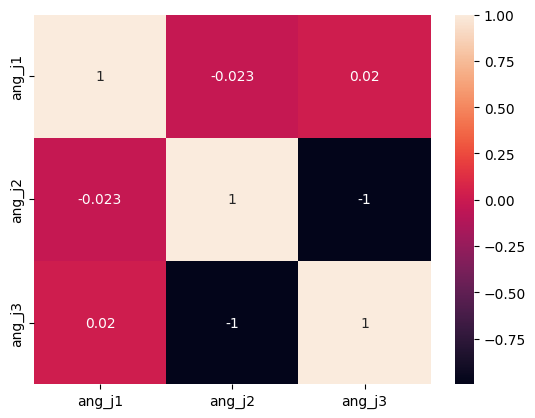

In [12]:
angles_to_plot = ['ang_j1', 'ang_j2', 'ang_j3']
corr = program_1[angles_to_plot].corr()
sns.heatmap(corr, annot=True)

먼저 heatmap에서는 각 파라미터끼리 대조하여 둘 사이에 얼마나 상관관계가 있는지 나타낸다. 색상은 오른쪽의 세로 막대 기준표를 참고하여 파악해야하며, 색상과 더불어 각 칸마다 표시되어 있는 상관계수로도 상관관계를 알 수 있다. -1은 음의 상관관계, 1은 양의 상관관계, 0은 전혀 상관관계가 없다는 것을 의미한다. 여기서 음과 양의 상관관계는 각각 반비례와 비례 관계를 의미한다.  
  
위의 heatmap을 살펴보면 'ang_j1'은 'ang_j2'와 'ang_j3'에 대해 적색을 띄고 있으며 상관계수도 -0.023과 0.02를 나타낸다. 두 수치는 사실상 거의 0에 매우 가까운 수치이며 상관관계가 없음을 의미한다. 실제 위의 line chart에서도 'ang_j1'은 나머지 두 개의 파라미터 그래프와도 겹치는 부분이 없었으며, 그래프 형태에서도 상관관계를 보이지 않고 있다. 이어서 'ang_j2'와 'ang_j3'은 검은색과 -1의 수치를 나타내고 있다. 음의 상관관계를 가지고 있다는 것을 의미하며, 실제 line chart에서도 그래프 형태가 상하대칭인 모습을 보이고 있다. 또한 histogram에서도 데이터 분포 형태가 서로 좌우대칭을 이루고 있다. 이에 따라 'ang_j2'와 'ang_j3'은 서로 반비례적인 특성을 가지고 있음을 알 수 있다.

![](line_chart2.png)

![](histogram1.png)

#### 5) Analyze the results of the pairplot.

Interpret the meaning of the results of pairplot. What do the 16 subplots mean?

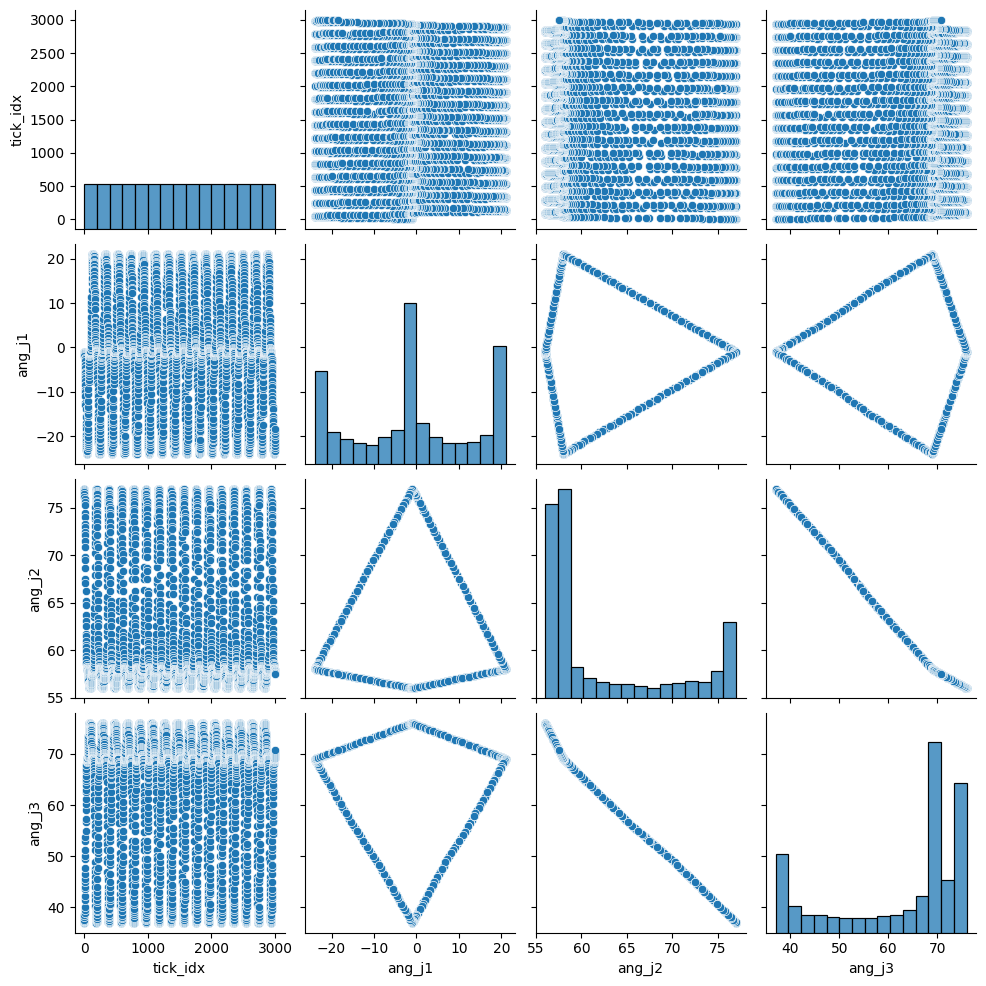

In [13]:
angles_to_plot = ['tick_idx', 'ang_j1', 'ang_j2', 'ang_j3']

sns.pairplot(program_1[angles_to_plot])

위의 pairplot은 'ang_j1', 'ang_j2', 'ang_j3'에 관하여 나타낸 것이다. 위의 16가지 경우의 pairplot에서 자기 자신의 파라미터에 대해 비교한 것(tick_idx 제외)은 histogram 형태를 띄고 있다. 위에서 살펴봤던 histogram과 매우 유사한 형태를 가지고 있으며, 각 데이터 구간마다 몇 개의 데이터를 가지고 있는지 나타낸다.   
  
3개의 histogram을 제외한 나머지 pairplot은 점으로 그래프를 나타낸 scatter chart의 형태를 띄고 있다. 먼저 파라미터끼리 비교한 scatter chart를 살펴보겠다. 앞서 heatmap으로 살펴봤듯이, 'ang_j2'와 'ang_j3'은 서로 음의 상관관계를 가지고 있었다. 이는 위의 pairplot에서 확인이 가능한데, 그래프의 모형이 마치 'y = -x' 함수의 그래프 형태와 매우 유사하다. 'y = -x'는 x와 y의 상관관계가 반비례 모습을 가지는 대표적인 그래프이며, 이는 곧 'ang_j2'와 'ang_j3'이 음의 상관관계를 가지고 있음을 증명하는 수단이 된다. 이어서 'ang_j1'에 대한 scatter chart는 0 부근을 기준으로 서로 좌우대칭인 모습을 가지고 있다. 하지만 앞서 살펴봤던 'y = -x'의 그래프와는 다르게 비례관계를 확인하기 어려우며, 이는 곧 상관관계를 가지고 있지 않는다는 것을 의미한다.
  
이어서 'tick_idx'과 각 파리미터를 비교한 그래프는 위의 line chart와 scatter chart에서 살펴보았던 그래프와 같은 형태를 띄고 있다. 모두 주기성을 가지고 있으며, 그래프에서 두꺼운 부분의 위치를 통해 어느 인덱스에서 값이 몰려있는지 대략적으로 확인이 가능하다. 다만 매우 큰 인덱스 개수에 비해 그래프의 크기가 작은 것과 더불어 점으로 데이터를 표기한 것으로 인해, line chart에 비해 파라미터의 정확한 분석을 시도하기 힘들다는 단점이 존재한다.
  
pairplot 그래프는 각 파리미터에 대한 다양한 정보를 한눈에 볼 수 있는 수단이며, 지금까지 여러 그래프를 통해 알아보았던 각 파라미터의 특징을 다시 한번 살펴볼 수 있는 기회가 되었다.